## K Means Clustering - ICLR

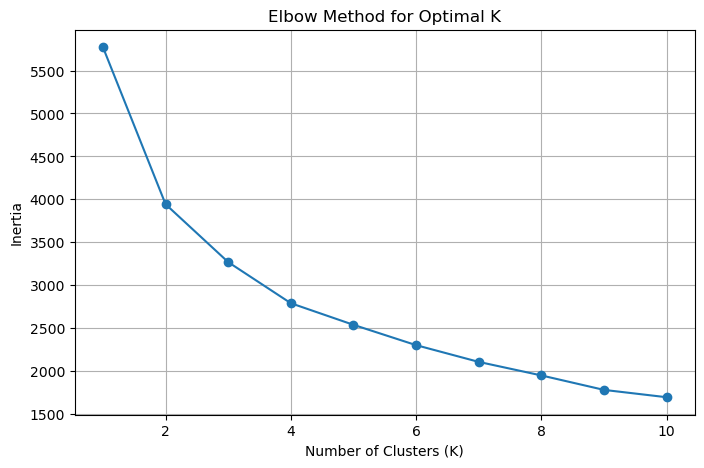

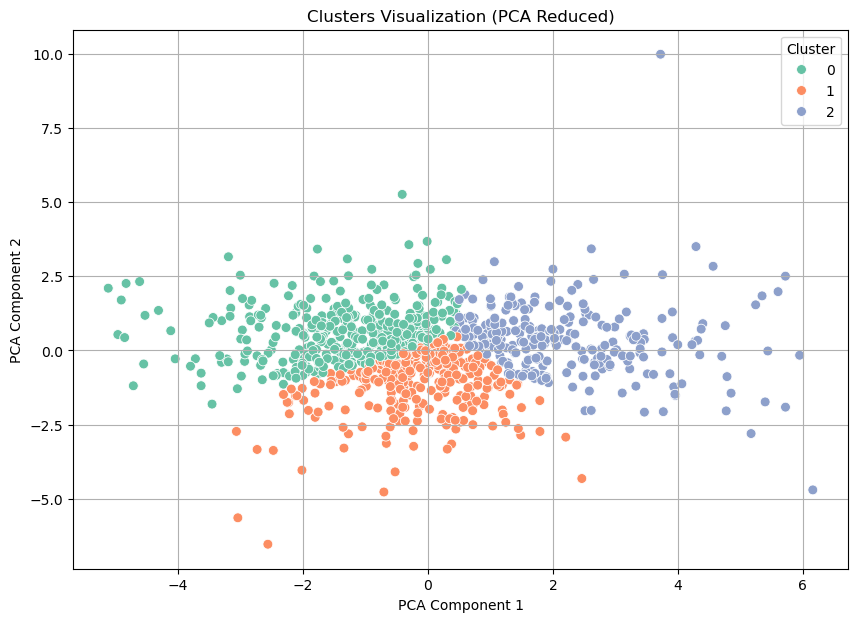

In [125]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../feature_extraction/iclr.csv')
data = data[data.status != "Withdraw"]
#data = data[data.status != "Desk Reject"]
data["status"] = data["status"].replace(['Desk Reject'], 'Reject')
#data["status"] = data["status"].replace(['Poster', 'Top-25%', 'Top-5%'], 'Accept')

# Select relevant features for clustering
math_complexity_features = [
    'num_equations', 'mean_num_new_symbols_introduced', 'num_overall_unique_symbols',
    'mean_num_unique_symbols', 'std_of_unique_symbols', 'max_representational_complexity'
]

#math_complexity_features = [
#    'num_equations', 'num_overall_unique_symbols', 'std_of_unique_symbols'
#]

# Select relevant features for clustering

# Combine features for clustering
features = math_complexity_features

# Filter the dataset for selected features
data_filtered = data[features]

# Handle missing values by imputing with the mean
data_filtered = data_filtered.fillna(data_filtered.mean())

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the optimal number of clusters (e.g., K=3 based on the elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=40)
kmeans.fit(data_scaled)

# Add cluster labels to the original data
data['cluster'] = kmeans.labels_

# Analyze clusters based on paper status
cluster_status = data.groupby(['cluster', 'status']).size().unstack(fill_value=0)
#print("\nCluster-wise Paper Status:\n")
#print(cluster_status)

# Compute average values of math complexity features for each cluster
cluster_averages = data.groupby('cluster')[math_complexity_features].mean()
#print('\nAverage Math Complexity Features per Cluster:\n')
#print(cluster_averages)

# Use PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a scatter plot for clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['cluster'], palette='Set2', s=50)
plt.title('Clusters Visualization (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Save the clustered dataset to a new CSV file
#output_path = '/mnt/data/iclr_clustered.csv'
#data.to_csv(output_path, index=False)
#print(f"Clustered data saved to {output_path}")

### Cluster-wise Paper Status

In [136]:
cluster_status

status,Poster,Reject,Top-25%,Top-5%
cluster,,,,
0,150,196,36,10
1,127,145,28,10
2,125,99,26,10


### Average Math Complexity Features per Cluster

In [138]:
cluster_averages

,num_equations,mean_num_new_symbols_introduced,num_overall_unique_symbols,mean_num_unique_symbols,std_of_unique_symbols,max_representational_complexity
cluster,,,,,,
0,427.471939,0.176690,52.545918,1.975744,2.784091,18.280612
1,230.790323,0.324212,58.603226,3.614809,4.348289,22.796774
2,898.807692,0.136327,104.884615,4.393918,5.015943,28.992308


## K Means Clustering NeurIPS

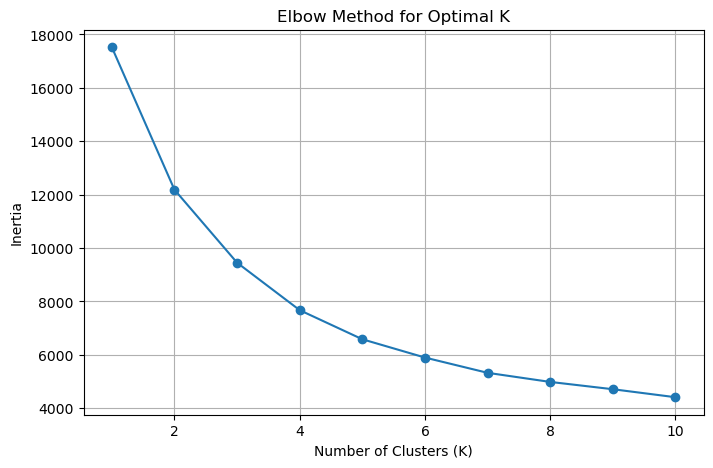

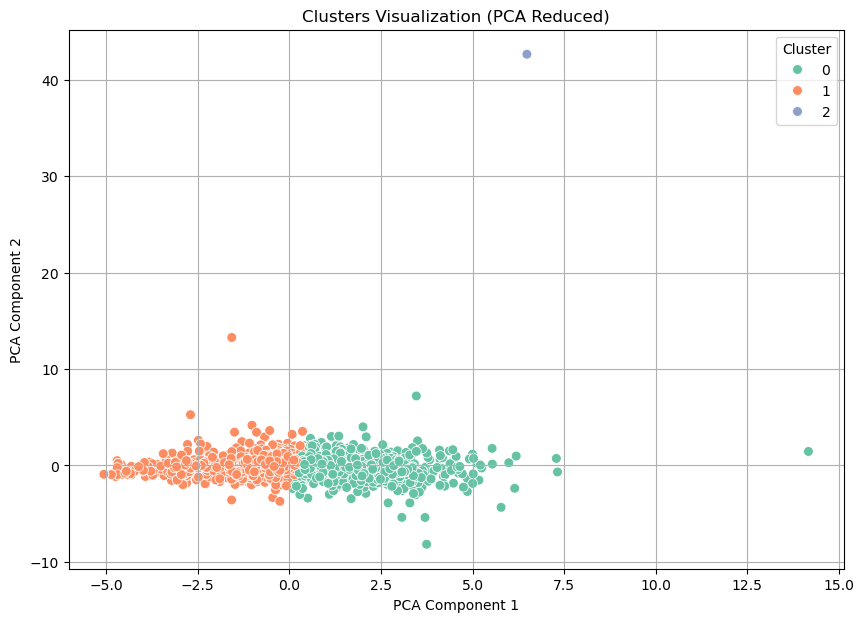

In [140]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../feature_extraction/neurips.csv')
data = data[data.status != "Withdraw"]
#data = data[data.status != "Desk Reject"]
data["status"] = data["status"].replace(['Desk Reject'], 'Reject')
#data["status"] = data["status"].replace(['Poster', 'Top-25%', 'Top-5%'], 'Accept')

# Select relevant features for clustering
math_complexity_features = [
    'num_equations', 'mean_num_new_symbols_introduced', 'num_overall_unique_symbols',
    'mean_num_unique_symbols', 'std_of_unique_symbols', 'max_representational_complexity'
]

#math_complexity_features = [
#    'num_equations', 'num_overall_unique_symbols', 'std_of_unique_symbols'
#]

# Select relevant features for clustering

# Combine features for clustering
features = math_complexity_features

# Filter the dataset for selected features
data_filtered = data[features]

# Handle missing values by imputing with the mean
data_filtered = data_filtered.fillna(data_filtered.mean())

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the optimal number of clusters (e.g., K=3 based on the elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=40)
kmeans.fit(data_scaled)

# Add cluster labels to the original data
data['cluster'] = kmeans.labels_

# Analyze clusters based on paper status
cluster_status = data.groupby(['cluster', 'status']).size().unstack(fill_value=0)
#print("\nCluster-wise Paper Status:\n")
#print(cluster_status)

# Compute average values of math complexity features for each cluster
cluster_averages = data.groupby('cluster')[math_complexity_features].mean()
#print('\nAverage Math Complexity Features per Cluster:\n')
#print(cluster_averages)

# Use PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a scatter plot for clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['cluster'], palette='Set2', s=50)
plt.title('Clusters Visualization (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Save the clustered dataset to a new CSV file
#output_path = '/mnt/data/iclr_clustered.csv'
#data.to_csv(output_path, index=False)
#print(f"Clustered data saved to {output_path}")

### Cluster-wise Paper Status

In [145]:
print(cluster_status)

status   Oral  Poster  Reject  Spotlight
cluster                                 
0          26     973      61        152
1          29    1423      88        167
2           0       1       0          0


### Average Math Complexity Features per Cluster

In [147]:
print(cluster_averages)

         num_equations  mean_num_new_symbols_introduced  \
cluster                                                   
0           754.384488                         0.190456   
1           269.448740                         0.310609   
2             1.000000                        30.000000   

         num_overall_unique_symbols  mean_num_unique_symbols  \
cluster                                                        
0                         92.607261                 4.157782   
1                         49.339192                 2.612998   
2                         30.000000                33.000000   

         std_of_unique_symbols  max_representational_complexity  
cluster                                                          
0                     4.956909                        30.141089  
1                     3.166980                        18.991213  
2                     0.000000                        33.000000  
